## This file contains python code to calculate LOWESS curves and potential inflection ages for this study's Sr isotope data

In [9]:
#Import python modules

from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import sem, t
lowess = sm.nonparametric.lowess
from scipy.stats import sem, t
from scipy.interpolate import interp1d # for interpolation of new data points
import statistics as stats
import math as math
%matplotlib inline

In [10]:
#Import and Define Data

filePoz = pd.read_excel('../Data/PozarySr.xlsx')
Pozarydata = filePoz[['Age','Sr','Error']]
data_extract_Sr = Pozarydata['Sr']
data_extract_age = Pozarydata['Age']
data_extract_error = Pozarydata['Error']

Sr = data_extract_Sr[0:19].to_numpy()
Age = data_extract_age[0:19].to_numpy()
Error = data_extract_error.to_numpy()

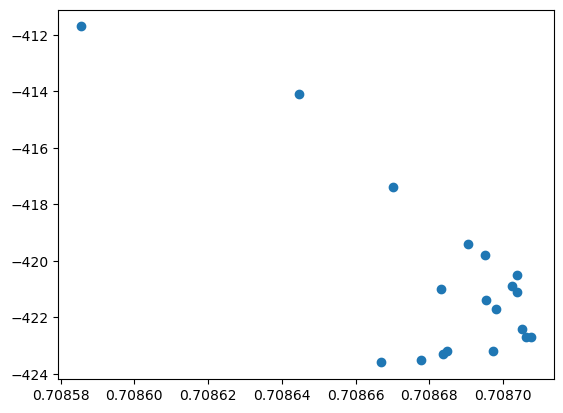

In [13]:
#Scatter Plot

plt.scatter(Sr, Age)

# Python LOWESS and Gradients Analysis

In [4]:
#LOWESS

Srlowess = lowess(Sr, Age, frac=0.7)

lowessdata = pd.DataFrame({'Age':Srlowess[:,0],'LOWESS':Srlowess[:,1]})

lowessdata

,Age,LOWESS
0,415.4,0.708588
1,417.8,0.708639
2,419.6,0.708677
3,420.2,0.708688
4,420.3,0.708690
5,420.6,0.708694
6,420.7,0.708695
7,420.7,0.708695
8,420.8,0.708696
9,420.9,0.708697


In [5]:
#LOWESS First Derivative

n = len(lowessdata)
        
#GTS 2020       
lowessfirstderiv = np.zeros(n)

for i in range(n):
    if i == 0:
        lowessfirstderiv[i] = np.NaN
    else:
        lowessfirstderiv[i] = (lowessdata['LOWESS'][i] - lowessdata['LOWESS'][i-1])/\
        (lowessdata['Age'][i-1] - lowessdata['Age'][i])
            
        
#Make dataframe
lowessfirstderivdata = pd.DataFrame({'Age':lowessdata['Age'],'LOWESS 1D':lowessfirstderiv})

lowessfirstderivdata

<ipython-input-5-eb462d668324>:12: RuntimeWarning: invalid value encountered in double_scalars
  lowessfirstderiv[i] = (lowessdata['LOWESS'][i] - lowessdata['LOWESS'][i-1])/\


,Age,LOWESS 1D
0,415.4,NaN
1,417.8,-0.000021
2,419.6,-0.000021
3,420.2,-0.000018
4,420.3,-0.000016
5,420.6,-0.000013
6,420.7,-0.000012
7,420.7,NaN
8,420.8,-0.000011
9,420.9,-0.000010


In [6]:
#LOWESS Second Derivative

n = len(lowessdata)

lowesssecondderiv = np.zeros(n)

for i in range(n):
    if i == 0:
        lowesssecondderiv[i]=np.NaN
    else:
        lowesssecondderiv[i] = (lowessfirstderivdata['LOWESS 1D'][i] - lowessfirstderivdata['LOWESS 1D'][i-1])/\
        (lowessfirstderivdata['Age'][i] - lowessfirstderivdata['Age'][i-1])

#Make Data Frame
lowesssecondderivdata = pd.DataFrame({'Age':lowessdata['Age'],'LOWESS 2D':lowesssecondderiv})

lowesssecondderivdata

,Age,LOWESS 2D
0,415.4,NaN
1,417.8,NaN
2,419.6,-1.612746e-07
3,420.2,4.921600e-06
4,420.3,2.602286e-05
5,420.6,7.993190e-06
6,420.7,1.729874e-05
7,420.7,NaN
8,420.8,NaN
9,420.9,9.675202e-06


In [7]:
#Combine Data

lowessgradientdata = pd.DataFrame({'Age':lowessdata['Age'],'LOWESS':lowessdata['LOWESS'],\
                              'LOWESS 1D': lowessfirstderiv,'LOWESS 2D':lowesssecondderiv})

lowessgradientdata

,Age,LOWESS,LOWESS 1D,LOWESS 2D
0,415.4,0.708588,NaN,NaN
1,417.8,0.708639,-0.000021,NaN
2,419.6,0.708677,-0.000021,-1.612746e-07
3,420.2,0.708688,-0.000018,4.921600e-06
4,420.3,0.708690,-0.000016,2.602286e-05
5,420.6,0.708694,-0.000013,7.993190e-06
6,420.7,0.708695,-0.000012,1.729874e-05
7,420.7,0.708695,NaN,NaN
8,420.8,0.708696,-0.000011,NaN
9,420.9,0.708697,-0.000010,9.675202e-06


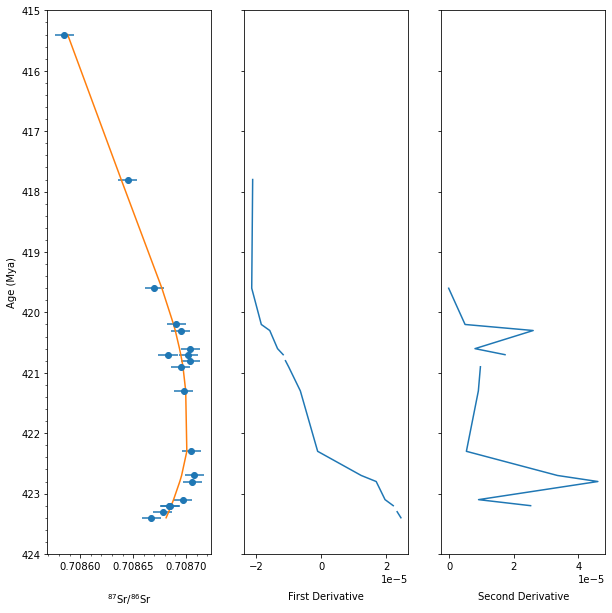

In [12]:
#Plot LOWESS and Data

xL = lowessgradientdata['LOWESS']
yL = lowessgradientdata['Age']
xS = Sr
yS = Age

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,10))

ax1.errorbar(Sr, Age, xerr=Error, fmt="o")
ax1.plot(xL,yL)
ax1.set_ybound(415,424)
ax1.invert_yaxis()
ax1.yaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.set(xlabel='$\mathregular{^{87}Sr/^{86}Sr}$')
ax1.set(ylabel='Age (Mya)')
ax1.xaxis.labelpad = 20

ax2.plot(lowessgradientdata['LOWESS 1D'],lowessgradientdata['Age'])
ax2.set_ybound(415,424)
ax2.invert_yaxis()
ax2.yaxis.set_ticklabels([])
ax2.set(xlabel='First Derivative')
ax2.xaxis.labelpad = 20

ax3.plot(lowessgradientdata['LOWESS 2D'],lowessgradientdata['Age'])
ax3.set_ybound(415,424)
ax3.invert_yaxis()
ax3.yaxis.set_ticklabels([])
ax3.set(xlabel='Second Derivative')
ax3.xaxis.labelpad = 20

plt.savefig('Pozary Sr LOWESS Derivative.svg')

In [9]:
#Range

print('Maximum LOWESS 2D', lowessgradientdata['Age'][lowessgradientdata['LOWESS 2D'].idxmax()],'Ma')

span = [0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]

LOWESS_Increase = [423.2,420.7,423.1,422.8,422.8,422.8,422.8,422.8,422.8,420.7,420.7,420.7]

inflection_range = pd.DataFrame({'Span':span,'LOWESS_Increase':LOWESS_Increase})

inflection_range

Maximum LOWESS 2D 422.8 Ma


,Span,LOWESS_Increase
0,0.35,423.2
1,0.40,420.7
2,0.45,423.1
3,0.50,422.8
4,0.55,422.8
5,0.60,422.8
6,0.65,422.8
7,0.70,422.8
8,0.75,422.8
9,0.80,420.7


In [10]:
#Calculate Increase CI

fi = LOWESS_Increase

xi = stats.mean(fi)
si = np.std(fi)
mi = len(fi)
dfi = n-1
a95i = 2.179 #t value for 12 samples

CI95i = (si/math.sqrt(mi))*a95i

print('95% CI:',xi,'+/-',CI95i)
print(min(fi))
print(max(fi))
print(mi)

95% CI: 422.15833333333336 +/- 0.6534267272169413
420.7
423.2
12
